In [1]:
%matplotlib inline
#%matplotlib widget


In [2]:
#############imports######################################################################
import cv2 as cv2
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import trackpy as tp
import matplotlib.colors as colors
from ipywidgets import HBox, Textarea, interact

In [3]:
def read_time(time_value):
    fps=25
    sign_index=time_value.index(':')
    minutes=int(time_value[0:sign_index])
    sec=int(time_value[sign_index+1:len(time_value)])
    frames=(minutes*60+sec)*25
    return frames

In [52]:
tts = np.arange(10)
z = pd.DataFrame({'t':tts,'x':[0]*len(tts)})
xy = pd.DataFrame({'t':[0,1,4,7,9],'x':[1,1,1,1,1]})
cond = z.t.isin(xy.t)
z.loc[cond,'x'] = xy.x

z[cond]

,t,x
0,0,1.0
1,1,1.0
4,4,1.0
7,7,NaN
9,9,NaN


In [11]:
expSumFileNamePassive='C:\\Users\\User\\Documents\\Eden\\locate_git_code\\packaged\\expSumPack.csv'
expSumPassive=pd.read_csv(expSumFileNamePassive,index_col=0)
#expSumPassive=expSumPassive[(expSumPassive['bots']!=8)]
suffix='_distances.csv'
passive_path='C:\\Users\\User\\Documents\\Eden\\locate_git_code\\distances'
close_threshold=140**2
too_close_thresh=100**2
countdf=pd.DataFrame()
#bot_nums=pd.DataFrame()
bottypes=['fronter','aligner']
for bottype in bottypes:
    relevant_table=expSumPassive[(expSumPassive['bottype']==bottype)]
    bot_num_array=pd.Series([]);
    bot_num_before=0
    bot_iteration=0
    for index,row in relevant_table.iterrows():
        FileName=row.locatingFileNamePack
        bot_num_current=row.bots
        if bot_num_current==bot_num_before:
            
            bot_iteration=bot_iteration+1
        else:
            bot_iteration=0
        #bot_num_array[index]=row.bots
        print(FileName)
        srtarting_frame=read_time(row.start_min)
        data=pd.read_csv(passive_path+'\\'+FileName+suffix,index_col=0)
        cond = (data.distance_sq<=close_threshold)&(data.distance_sq>too_close_thresh)
        dataCond = data[cond]
        #data['hascond']=np.where(cond,True,False)
        dataCG=dataCond.groupby(['frame'], as_index=False).count()
        dataCG.to_csv(passive_path+'\\dataCG_test.csv')
        #print(dataCG)
        #relevant_index=dataCG[dataCG['frame']==srtarting_frame].index.values
        #dataCG_relevant=dataCG.iloc[relevant_index.item():len(dataCG)]
        #dataCG_relevant_index=dataCG_relevant.index-srtarting_frame
        #dataCG_relevant.set_index(dataCG_relevant_index,inplace=True)
        data_count=pd.DataFrame(data={'frame': list(range(0,int(data.frame.iloc[-1])))})
        data_count['kissing_count']=np.zeros(len(data_count))
        #data_count[data_count['frame']==dataCG_relevant_index,'kissing_count']=dataCG_relevant.iloc[dataCG_relevant_index,2]
        data_count['kissing_count']=data_count['kissing_count'].where(,dataCG['distance_sq'])
        data_count.to_csv(passive_path+'\\data_count_test.csv')
        data_count['iteration']=np.ones(len(data_count))*bot_iteration
        data_count['bot_num']=np.ones(len(data_count))*bot_num_current
        bottype_array=[bottype]*len(data_count)
        data_count['bot_type']=bottype_array
        #data_count.to_csv(passive_path+'\\data_count_test.csv')
        #dataCG_relevant.to_csv(passive_path+'\\dataCG_relevant_test.csv')
        #dataCG.to_csv(passive_path+'\\dataCG_test.csv')
        countdf=pd.concat([countdf,dataCG_relevant],axis=0)
        #countdf[FileName]=
        countdf.to_csv(passive_path+'\\countdf_test.csv')
        bot_num_before=bot_num_current
    #bot_nums=pd.concat([bot_nums,bot_num_array.rename(bottype)],axis=1)
#countdf.fillna(0,inplace=True)
countdf.to_csv(passive_path+'\\countdf_test.csv')

C:\Users\User\AppData\Local\Temp\ipykernel_21388\4249103032.py:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  bot_num_array=pd.Series([]);


fronter_N001_D028_C0556.MP4_loc.csv


ValueError: Array conditional must be same shape as self

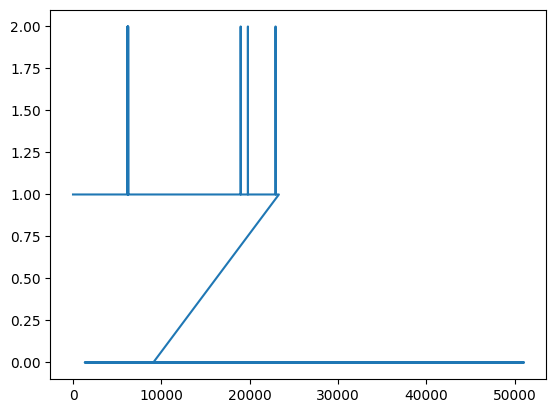

In [5]:
plt.plot(countdf.iloc[:,0])
#plt.plot(countdf.iloc[:,0:4],markeredgecolor='olive',marker='o',alpha=0.4,markerfacecolor='none',markeredgewidth=.1)
#plt.plot(countdf.iloc[:,5:10],markeredgecolor='cyan',marker='o',alpha=0.4,markerfacecolor='none',markeredgewidth=.1)
#plt.plot(countdf)
#column_names = list(countdf.columns.values)
#plt.axis([12500,20000,0,4])
#plt.legend(column_names)
#plt.axis([1000,1300,-1,8])

In [19]:
#expSumPassive=expSumPassive[(expSumPassive['bots']!=8)]
fronters_count=countdf[(countdf['bot_type']=='fronter')]
fronters_count.to_csv(passive_path+'\\fronters_count.csv')
aligners_count=countdf[(countdf['bot_type']=='aligner')]
aligners_count.to_csv(passive_path+'\\aligners_count.csv')


In [32]:
fronter_mean=fronters_count.groupby(by=['bot_num','frame']).mean()
print(fronter_mean)

                 distance_sq  iteration
bot_num frame                          
1.0     225.0            1.0        2.0
        226.0            1.0        2.0
        227.0            1.0        2.0
        228.0            1.0        2.0
        229.0            1.0        2.0
...                      ...        ...
53.0    23456.0          6.0        2.0
        23457.0          6.0        2.0
        23458.0          6.0        2.0
        23459.0          5.0        2.0
        23460.0          5.0        2.0

[160341 rows x 2 columns]


C:\Users\User\AppData\Local\Temp\ipykernel_7132\2418247011.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fronter_mean=fronters_count.groupby(by=['bot_num','frame']).mean()


In [30]:
aligners_count=countdf[(countdf['bot_type']=='aligner')]
aligners_count

,frame,distance_sq,iteration,bot_num,bot_type
-1,250.0,1,0.0,1.0,aligner
0,251.0,1,0.0,1.0,aligner
1,252.0,1,0.0,1.0,aligner
2,253.0,1,0.0,1.0,aligner
3,254.0,1,0.0,1.0,aligner
...,...,...,...,...,...
25429,30392.0,1,3.0,53.0,aligner
25430,30393.0,1,3.0,53.0,aligner
25431,30394.0,1,3.0,53.0,aligner
25432,30395.0,1,3.0,53.0,aligner


In [37]:
aligners_mean=aligners_count.groupby(by=["bot_num","frame"]).mean()
print(aligners_mean)

                 distance_sq  iteration
bot_num frame                          
1.0     150.0            1.0        1.0
        151.0            1.0        1.0
        152.0            1.0        1.0
        153.0            1.0        1.0
        154.0            1.0        1.0
...                      ...        ...
53.0    30392.0          1.0        3.0
        30393.0          1.0        3.0
        30394.0          1.0        3.0
        30395.0          1.0        3.0
        30396.0          1.0        3.0

[135827 rows x 2 columns]


C:\Users\User\AppData\Local\Temp\ipykernel_7132\3658395652.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aligners_mean=aligners_count.groupby(by=["bot_num","frame"]).mean()


In [38]:
fronter_mean=fronters_count.groupby(['bot_num','frame']).mean()
fronter_std=fronters_count.groupby(['bot_num','frame']).std()

aligners_mean=aligners_count.groupby(['bot_num','frame']).mean()
aligners_std=aligners_count.groupby(['bot_num','frame']).std()

C:\Users\User\AppData\Local\Temp\ipykernel_7132\2420960672.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fronter_mean=fronters_count.groupby(['bot_num','frame']).mean()
C:\Users\User\AppData\Local\Temp\ipykernel_7132\2420960672.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fronter_std=fronters_count.groupby(['bot_num','frame']).std()
C:\Users\User\AppData\Local\Temp\ipykernel_7132\2420960672.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which

In [22]:
fronter_mean.index.get_level_values('bot_num').unique

<bound method Index.unique of Float64Index([ 1.0,  1.0,  1.0,  1.0,  1.0,  1.0,  1.0,  1.0,  1.0,  1.0,
              ...
              53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0],
             dtype='float64', name='bot_num', length=160341)>

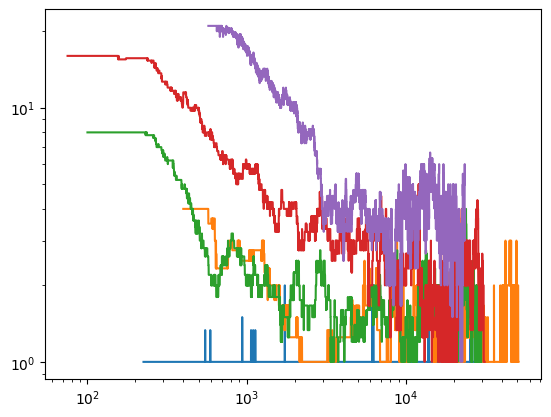

In [23]:
for i in [1,4,8,16,53]:
    current_data=fronter_mean.loc[i]
    #print(current_data)
    plt.loglog(current_data['distance_sq'])
#test=pd.DataFrame(fronter_mean.loc[1])


In [39]:
aligners_mean

distance_sq  iteration
bot_num frame                          
1.0     150.0            1.0        1.0
        151.0            1.0        1.0
        152.0            1.0        1.0
        153.0            1.0        1.0
        154.0            1.0        1.0
...                      ...        ...
53.0    30392.0          1.0        3.0
        30393.0          1.0        3.0
        30394.0          1.0        3.0
        30395.0          1.0        3.0
        30396.0          1.0        3.0

[135827 rows x 2 columns]

In [62]:
current_data_aligners.index

Float64Index([  625.0,   626.0,   627.0,   628.0,   629.0,   630.0,   631.0,
                632.0,   633.0,   634.0,
              ...
              30387.0, 30388.0, 30389.0, 30390.0, 30391.0, 30392.0, 30393.0,
              30394.0, 30395.0, 30396.0],
             dtype='float64', name='frame', length=29772)

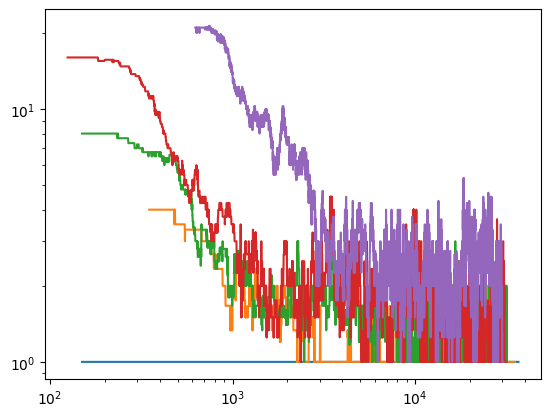

In [41]:
for j in [1,4,8,16,53]:
    current_data_aligners=aligners_mean.loc[j]
    #print(current_data)
    plt.loglog(current_data_aligners['distance_sq'])

ValueError: shape mismatch: objects cannot be broadcast to a single shape

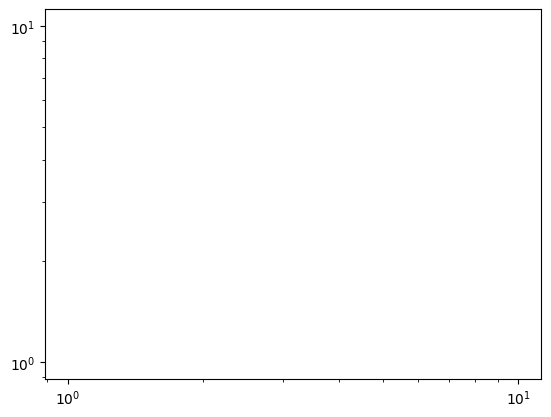

In [47]:
#plt.loglog(fronter_mean,color='olive')
fig = plt.figure()
ax = plt.axes()
ax.set_xscale("log")
ax.set_yscale("log")
lines = fronter_mean.group.unique()
for i in lines:
  ax.errorbar(x=list(range(0,len(fronter_mean.iloc[:,i]))),y=fronter_mean.iloc[:,i],yerr=fronter_std.iloc[:,i],ecolor='red',color='blue',alpha=0.4)  
#ax.errorbar(list(range(0,len(fronter_mean))),fronter_mean,yerr=fronter_std,ecolor='red',color='blue',alpha=0.4)
ax.errorbar(list(range(0,len(alingers_mean))),alingers_mean,color='cyan',yerr=alingers_std,ecolor='pink',alpha=0.4)
plt.axis([1E2,5E3,0.9,10])

In [45]:
start_min=expSumPassive.start_min

In [ ]:
start_min

In [1]:
plt.plot(countdf.iloc[:,0],markeredgecolor='olive',marker='o',alpha=0.4,markerfacecolor='none',markeredgewidth=.1)

NameError: name 'plt' is not defined

## mean according to second

C:\Users\User\AppData\Local\Temp\ipykernel_18016\144213019.py:5: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.axis([0,3E4,0.9,10])


(0.6996459342373635, 30000.0, 0.9, 10.0)

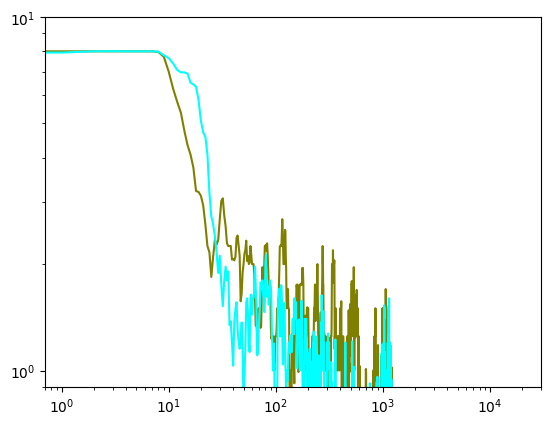

In [21]:
fronters_count_mean=fronter_mean.groupby(np.arange(len(fronters_count))//(25)).mean()
alingers_count_mean=alingers_mean.groupby(np.arange(len(alingers_count))//(25)).mean()
plt.loglog(fronters_count_mean,color='olive')
plt.loglog(alingers_count_mean,color='cyan')
plt.axis([0,3E4,0.9,10])

In [16]:
fronters_count_mean

,fronter_N008_D028_C0567.MP4_loc.csv,fronter_N008_D028_C0566.MP4_loc.csv,fronter_N008_D028_C0565.MP4_loc.csv,fronter_N008_D028_C0563.MP4_loc.csv
0,7.64,7.76,2.76,4.92
1,8.00,8.00,8.00,8.00
2,8.00,8.00,8.00,8.00
3,8.00,8.00,8.00,8.00
4,8.00,8.00,8.00,8.00
...,...,...,...,...
1262,0.00,0.00,0.00,0.00
1263,0.00,0.00,0.00,0.00
1264,0.00,0.00,0.00,0.00
1265,0.00,0.00,0.00,0.00


## mean according to mooving 

## fronters

In [63]:
fronters_count_mean_window

frame
575.0           NaN
576.0           NaN
577.0           NaN
578.0           NaN
579.0           NaN
             ...   
23456.0    3.260000
23457.0    3.263000
23458.0    3.266000
23459.0    3.268333
23460.0    3.270333
Name: distance_sq, Length: 22886, dtype: float64

C:\Users\User\AppData\Local\Temp\ipykernel_7132\1434680441.py:17: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.axis([0,1E5,0,20])


(1322.699328256569, 100000.0, 0.0, 20.0)

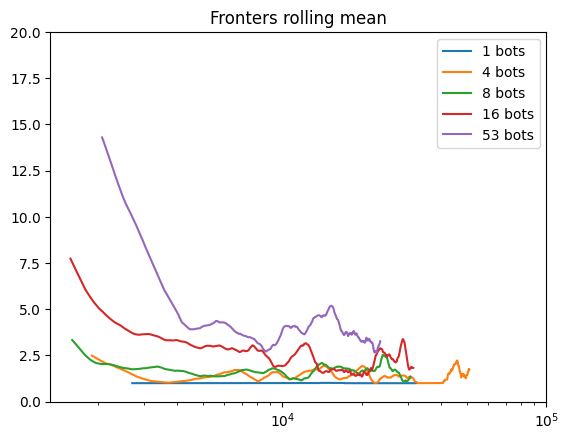

In [54]:
I=25*60
fig = plt.figure()
ax = plt.axes()
ax.set_xscale("log")
for i in [1,4,8,16,53]:
    current_data=fronter_mean.loc[i]
    current_data_std=fronter_std.loc[i]
    fronters_count_mean_window=current_data['distance_sq'].rolling(I).mean()
    #print(fronters_count_mean_window)
    #fronters_count_std_window=fronter_std['distance_sq'].rolling(I).mean()
    #print(fronters_count_std_window)
    #print(current_data)
    plt.plot(fronters_count_mean_window,label='{:d} bots'.format(i))
    ax.legend()
    plt.title('Fronters rolling mean')
    #ax.errorbar(list(range(0,len(fronters_count_mean_window))),fronters_count_mean_window,yerr=fronters_count_std_window,ecolor='yellow',color='olive',alpha=0.9)
plt.axis([0,1E5,0,20])

## aligners

C:\Users\User\AppData\Local\Temp\ipykernel_7132\1221532488.py:17: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.axis([0,1E5,0,20])


(141.1806496982721, 100000.0, 0.0, 20.0)

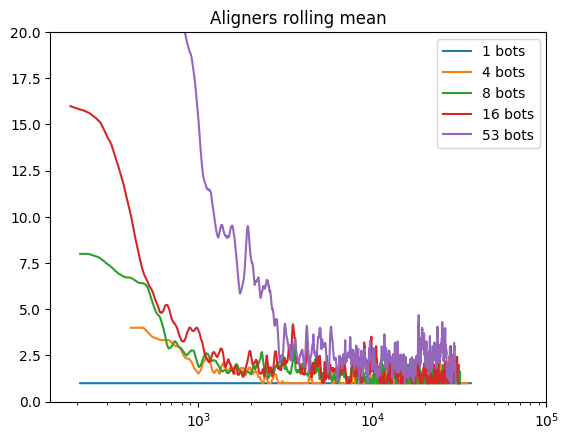

In [56]:
I=1*60
fig = plt.figure()
ax = plt.axes()
ax.set_xscale("log")
for i in [1,4,8,16,53]:
    current_data=aligners_mean.loc[i]
    current_data_std=aligners_std.loc[i]
    alingers_count_mean_window=current_data['distance_sq'].rolling(I).mean()
    #print(alingers_count_mean_window)
    #fronters_count_std_window=fronter_std['distance_sq'].rolling(I).mean()
    #print(fronters_count_std_window)
    #print(current_data)
    plt.plot(alingers_count_mean_window,label='{:d} bots'.format(i))
    ax.legend()
    plt.title('Aligners rolling mean')
    #ax.errorbar(list(range(0,len(fronters_count_mean_window))),fronters_count_mean_window,yerr=fronters_count_std_window,ecolor='yellow',color='olive',alpha=0.9)
plt.axis([0,1E5,0,20])

# I=25*60
fig = plt.figure()
ax = plt.axes()
ax.set_xscale("log")
fronters_count_mean_window=fronter_mean.rolling(I).mean()
fronters_count_std_window=fronter_std.rolling(I).mean()
alingers_count_mean_window=alingers_mean.rolling(I).mean()
alingers_count_std_window=alingers_std.rolling(I).mean()
ax.errorbar(list(range(0,len(alingers_count_mean_window))),alingers_count_mean_window,color='cyan',yerr=alingers_count_std_window,ecolor='pink',alpha=0.4)
ax.errorbar(list(range(0,len(fronters_count_mean_window))),fronters_count_mean_window,yerr=fronters_count_std_window,ecolor='yellow',color='olive',alpha=0.9)
plt.axis([0,1E5,0,10])